In [1]:
import re
import numpy as np
import seaborn as sns
import os
import pandas as pd
import sklearn as sk
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import scipy
from scipy.stats import t
from sklearn.manifold import TSNE
import time

In [2]:
print(os.listdir(), '\n', os.getcwd())

with open('plot_time.csv', 'r') as init_data:
    raw_data = pd.read_csv(init_data)

['.git', '.gitattributes', '.ipynb_checkpoints', 'big_MCI_plot.png', 'data_analysis_script.py', 'Data_story.ipynb', 'daybreak_eda2.csv', 'DX_bl_big_MCI_plot.png', 'EDA.ipynb', 'eda2.ipynb', 'plot_time.csv', 'prelim data analysis.py', 'PTGENDER_big_MCI_plot.png', 'simple_data.csv', 'Stats.ipynb', 'stats.txt', 'stats_report.ipynb', 'TADPOLE_D1_D2.csv', 'TADPOLE_D1_D2.py', 'TADPOLE_D1_D2_Dict.csv', 'TADPOLE_D2.m', 'TADPOLE_D3.csv', 'TADPOLE_D3.m', 'TADPOLE_readme.txt', 'Untitled.ipynb'] 
 C:\Users\work_cbdvl\Documents\GitHub\Project-daybreak


In [3]:
patients = raw_data.loc[:,"RID"].unique()

changers = np.zeros(len(patients))
impaired = np.zeros(len(patients))

cata = pd.DataFrame(patients)
cata["change"] = changers
cata["impaired"] = impaired
cata.rename(columns={0:"RID"}, inplace=True)

for i,v in enumerate(cata.loc[:,"RID"]):
    vals = raw_data.loc[raw_data["RID"] == v, ["DX_bl", "DXCHANGE"]]
    if sum(vals.DXCHANGE > 3) > 0:
        cata.loc[i, "change"] = 1
    if ((vals.DX_bl.any() != "CN") | sum(vals.DXCHANGE > 1) > 0):
        cata.loc[i, "impaired"] = 1      
merge = pd.merge(raw_data, cata, on="RID", how="outer")       

In [4]:
merge.PTGENDER = merge.PTGENDER.astype("category")
merge.PTMARRY = merge.PTMARRY.astype("category")
merge.PTETHCAT = merge.PTETHCAT.astype("category")
merge.PTRACCAT = merge.PTRACCAT.astype("category")
merge.change = merge.change.astype("category")
merge.impaired = merge.impaired.astype("category")


In [5]:
merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12740
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Unnamed: 0                  12741 non-null  int64   
 1   RID                         12741 non-null  int64   
 2   EXAMDATE                    12741 non-null  object  
 3   DX_bl                       12741 non-null  object  
 4   AGE                         12741 non-null  float64 
 5   PTGENDER                    12741 non-null  category
 6   PTEDUCAT                    12741 non-null  int64   
 7   PTETHCAT                    12741 non-null  category
 8   PTRACCAT                    12741 non-null  category
 9   PTMARRY                     12741 non-null  category
 10  APOE4                       12729 non-null  float64 
 11  EXAMDATE_bl                 12741 non-null  object  
 12  CDRSB_bl                    12741 non-null  float64 
 13  ADAS11_bl       

In [6]:
filled = merge.copy()
filled.head()

,Unnamed: 0,RID,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,...,Entorhinal,MidTemp,FDG,AV45,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,VISNUMS,change,impaired
0,0,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.36926,NaN,NaN,NaN,NaN,0,1.0,1.0
1,5723,2,2006-03-06,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,NaN,NaN,1.21655,NaN,NaN,NaN,NaN,6,1.0,1.0
2,5724,2,2008-08-27,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,1.0,1.0
3,5725,2,2010-09-22,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,1.0,1.0
4,5726,2,2011-03-04,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,1.0,1.0


In [7]:
tic = time.perf_counter()
fill4 = filled.fillna(filled.groupby('RID').transform('mean'))
toc = time.perf_counter()
print(toc-tic)
fill4.loc[fill4.RID==2,:]

16.844646900000043


,Unnamed: 0,RID,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,...,Entorhinal,MidTemp,FDG,AV45,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,VISNUMS,change,impaired
0,0,2,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.369260,NaN,NaN,NaN,NaN,0,1.0,1.0
1,5723,2,2006-03-06,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.216550,NaN,NaN,NaN,NaN,6,1.0,1.0
2,5724,2,2008-08-27,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,36,1.0,1.0
3,5725,2,2010-09-22,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,60,1.0,1.0
4,5726,2,2011-03-04,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,66,1.0,1.0
5,5727,2,2011-09-19,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,72,1.0,1.0
6,5728,2,2012-03-22,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,78,1.0,1.0
7,5729,2,2012-09-26,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,84,1.0,1.0
8,5730,2,2013-03-25,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,90,1.0,1.0
9,5731,2,2013-09-09,CN,74.3,Male,16,Not Hisp/Latino,White,Married,...,4177.0,27936.0,1.292905,NaN,NaN,NaN,NaN,96,1.0,1.0


In [8]:
#tic = time.perf_counter()
#for c,v in enumerate(merge.RID.unique()):
#    filled.loc[filled.RID == v, :] = filled.loc[filled.RID == v, :].fillna(filled.loc[filled.RID == v, :].mean())

#toc = time.perf_counter()
#print(toc-tic)
#filled.info()
#print("97.1858261999987 seconds")

decision tree 1st
boosting 2nd 
k nearest neighbour (no reall training)
gaussian biased model - needs independant 
naive bayes
summarise results in a table + training time
pros, cons and assumptions. of algorithms
then grid search.

ensure hyper parameters maxima are not at a boundary

intro: point of project.
value to customer
discuss the results be honest about shortcommings of model/analysis // strengths/weaknesses.
future work:




finally ensemble method.

In [9]:
pts = merge.groupby("RID")
pts_mean = pts.mean()
fill2 = merge.combine_first(pts_mean)
fill3 = pd.merge(merge, pts_mean, on="RID", how="outer")
#merge.info()
#fill2.info()

m2 = merge.loc[merge.RID==2,:]
f2 = fill2.loc[fill2.RID==2,:]
f3 = fill3.loc[fill3.RID==2,:]


print(m2.FDG)
print(f2.FDG)
print(f3.loc[:,["FDG_x", "FDG_y"]])
print(filled.loc[filled.RID==2,"FDG"])
print(fill3.info())




0     1.36926
1     1.21655
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
Name: FDG, dtype: float64
0     1.369260
1     1.216550
2     1.292905
3     1.074235
4          NaN
5     1.319690
6          NaN
7          NaN
8     1.264300
9          NaN
10    1.042469
11         NaN
12         NaN
Name: FDG, dtype: float64
      FDG_x     FDG_y
0   1.36926  1.292905
1   1.21655  1.292905
2       NaN  1.292905
3       NaN  1.292905
4       NaN  1.292905
5       NaN  1.292905
6       NaN  1.292905
7       NaN  1.292905
8       NaN  1.292905
9       NaN  1.292905
10      NaN  1.292905
11      NaN  1.292905
12      NaN  1.292905
0     1.36926
1     1.21655
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
Name: FDG, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741

In [10]:
filled.loc[filled.RID==2,"FDG"]

0     1.36926
1     1.21655
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
Name: FDG, dtype: float64

In [11]:
#for c,v in enumerate(merge.columns):
#    print(c,v)
features = [4, 5, 10, 12, 13, 15, 16, 17, 21, 22, 24, 25, 26, 27, 35, 37, 43, 44, 45]
target = 48

In [12]:
len(features)

19

In [13]:
x = fill4.iloc[:,features]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12740
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   AGE                         12741 non-null  float64 
 1   PTGENDER                    12741 non-null  category
 2   APOE4                       12729 non-null  float64 
 3   CDRSB_bl                    12741 non-null  float64 
 4   ADAS11_bl                   12724 non-null  float64 
 5   MMSE_bl                     12741 non-null  int64   
 6   RAVLT_immediate_bl          12705 non-null  float64 
 7   RAVLT_learning_bl           12705 non-null  float64 
 8   Ventricles_bl               12251 non-null  float64 
 9   Hippocampus_bl              10960 non-null  float64 
 10  Entorhinal_bl               10847 non-null  float64 
 11  Fusiform_bl                 10847 non-null  float64 
 12  MidTemp_bl                  10847 non-null  float64 
 13  ICV_bl          

In [14]:
t1 = x.copy()
t1["rid"] =  filled.RID
t1["impaired"] = filled.impaired
t1["female"] = 1
t1.loc[t1.PTGENDER == "Male","female"] = 0
t1 = t1.drop("PTGENDER", axis=1)
t1.impaired = t1.impaired.astype("int")
t2 = t1.dropna()
t2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7302 entries, 13 to 12740
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         7302 non-null   float64
 1   APOE4                       7302 non-null   float64
 2   CDRSB_bl                    7302 non-null   float64
 3   ADAS11_bl                   7302 non-null   float64
 4   MMSE_bl                     7302 non-null   int64  
 5   RAVLT_immediate_bl          7302 non-null   float64
 6   RAVLT_learning_bl           7302 non-null   float64
 7   Ventricles_bl               7302 non-null   float64
 8   Hippocampus_bl              7302 non-null   float64
 9   Entorhinal_bl               7302 non-null   float64
 10  Fusiform_bl                 7302 non-null   float64
 11  MidTemp_bl                  7302 non-null   float64
 12  ICV_bl                      7302 non-null   float64
 13  MMSE                        730

In [15]:

ts = t2.groupby("impaired")
ts.count()

,AGE,APOE4,CDRSB_bl,ADAS11_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,Ventricles_bl,Hippocampus_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MMSE,Hippocampus,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,rid,female
impaired,,,,,,,,,,,,,,,,,,,,
0,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542
1,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760,5760


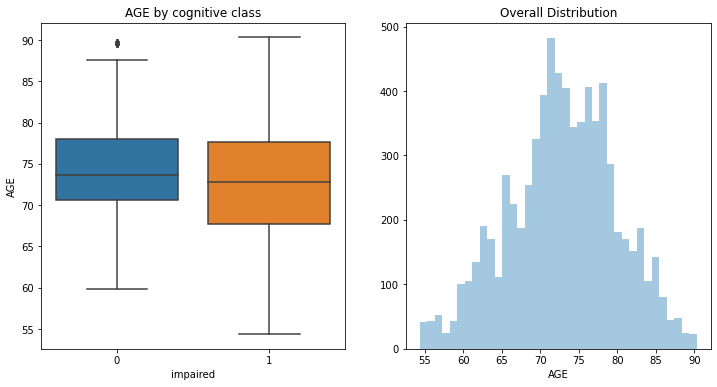

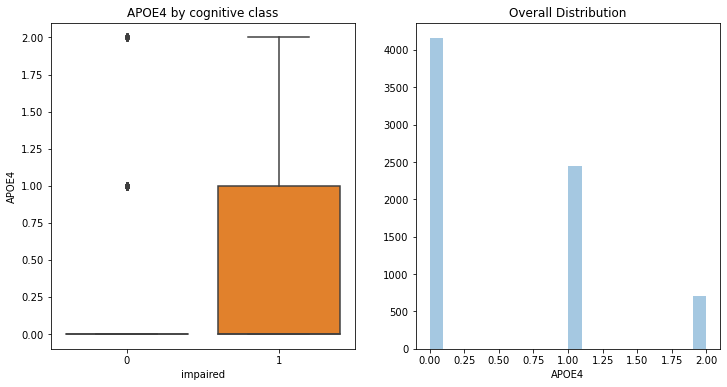

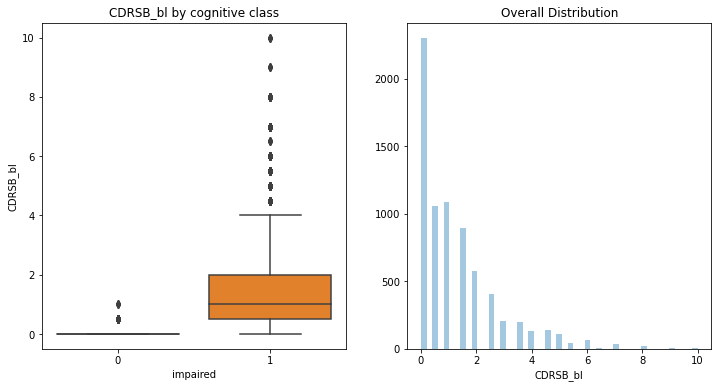

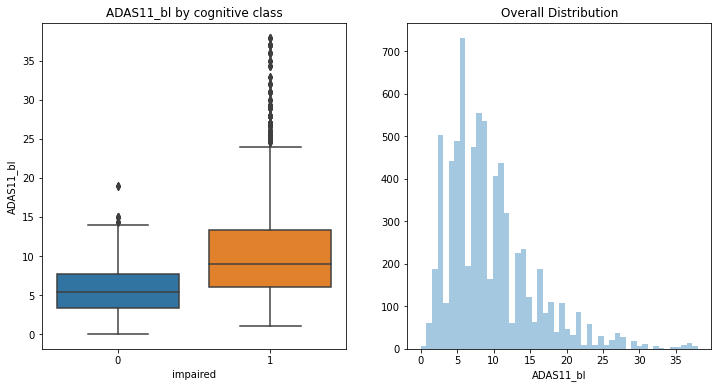

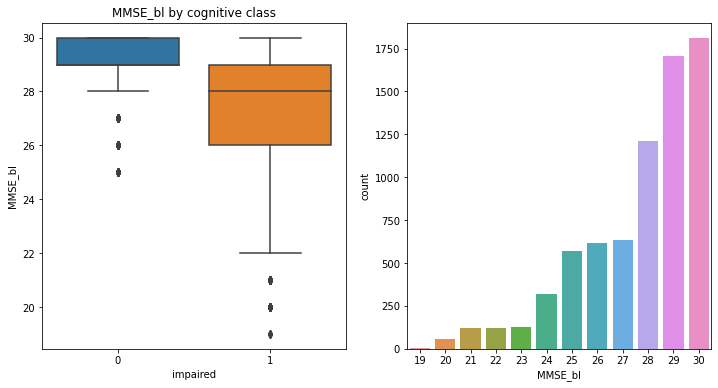

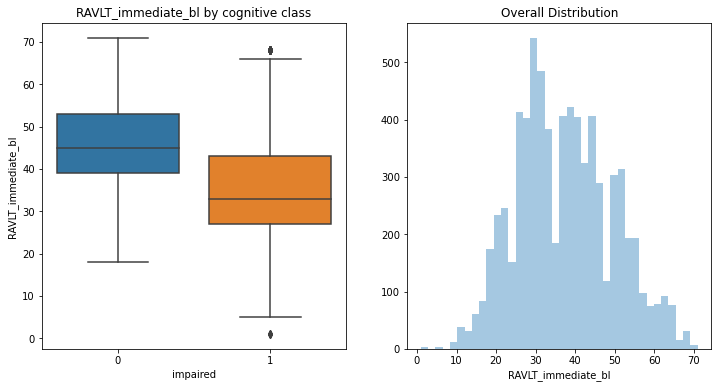

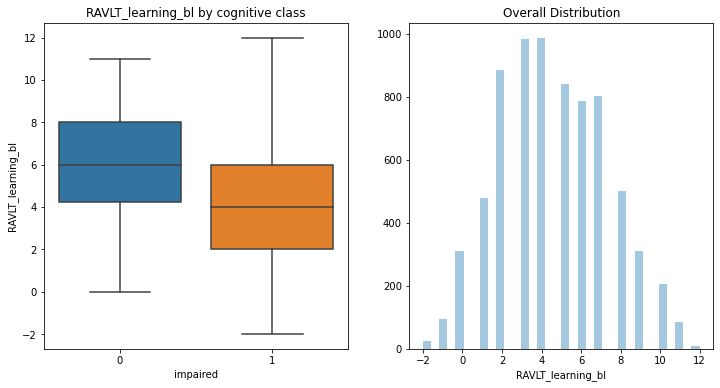

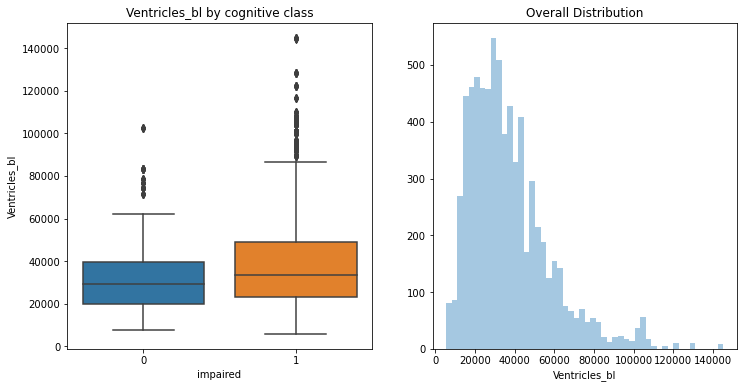

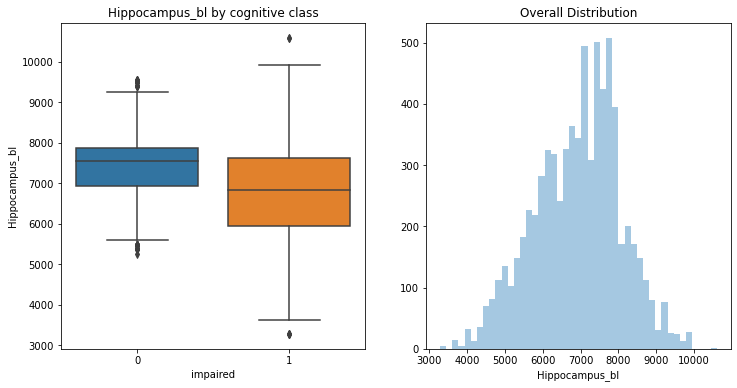

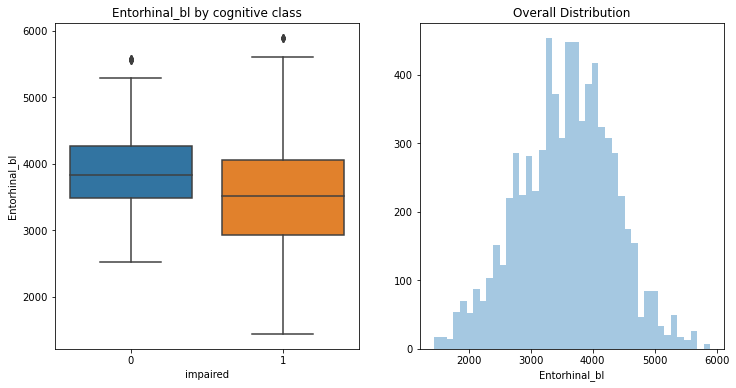

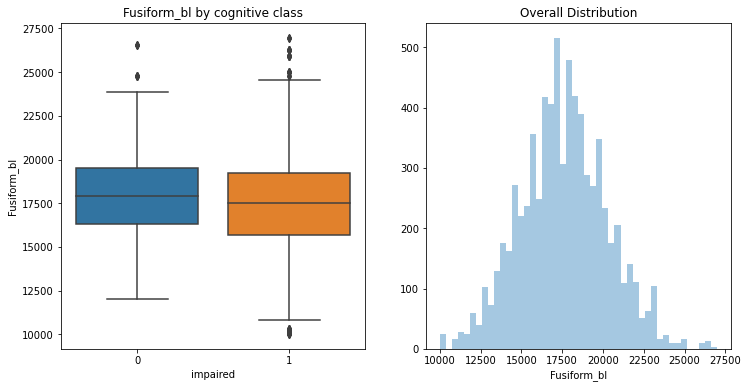

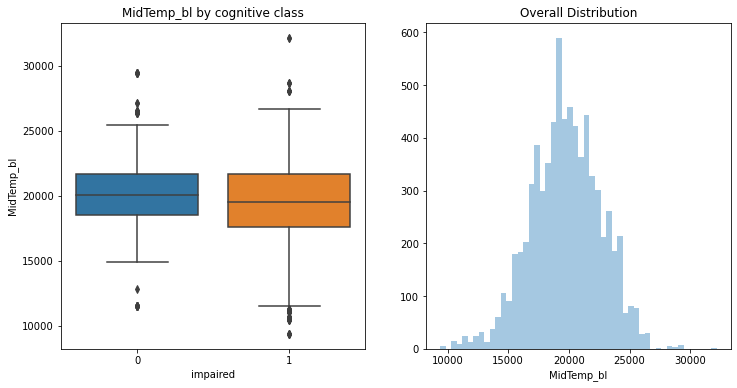

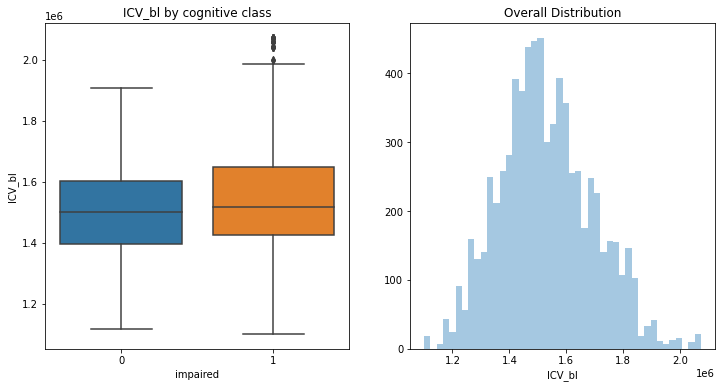

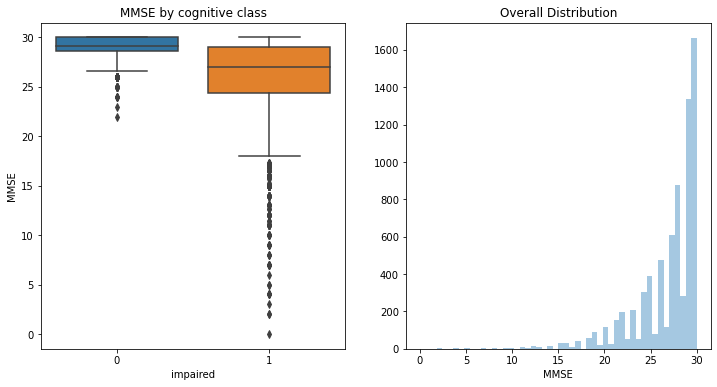

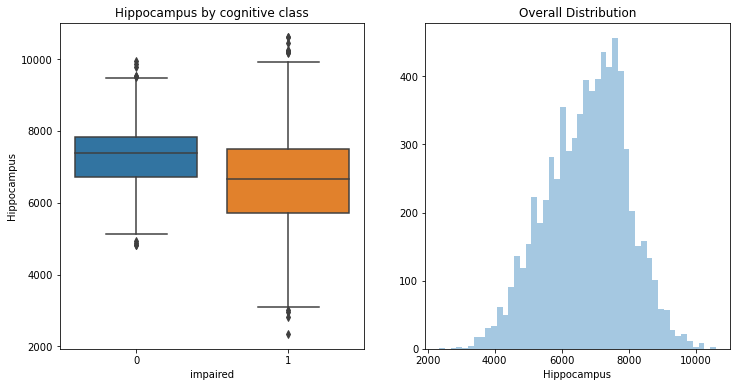

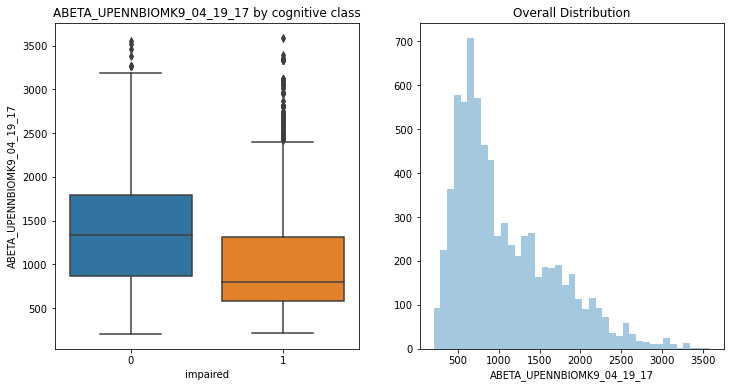

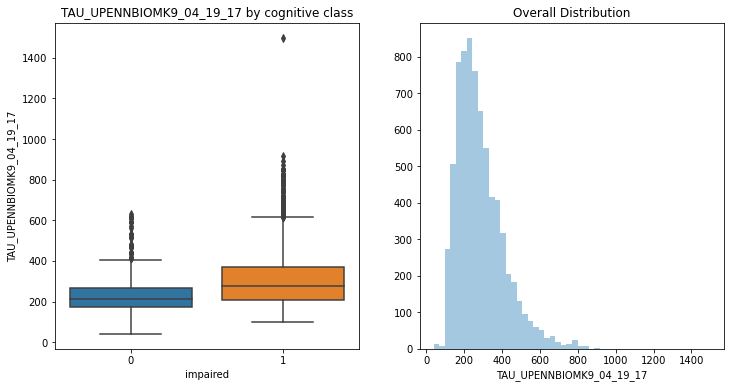

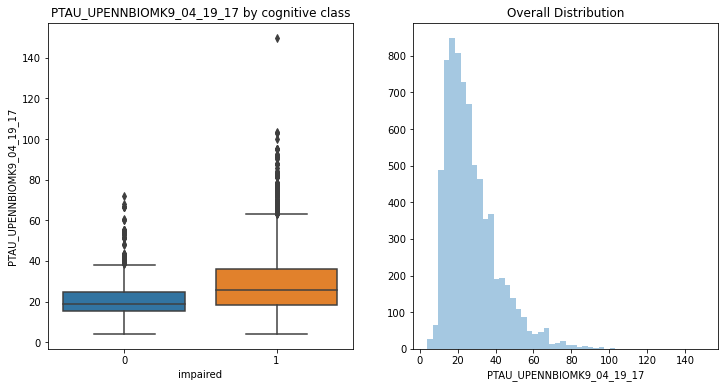

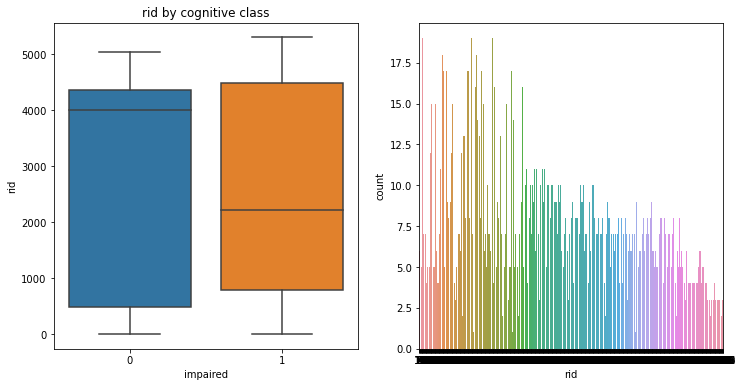

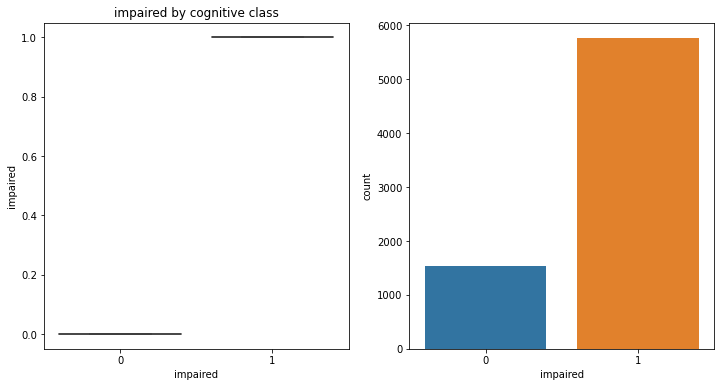

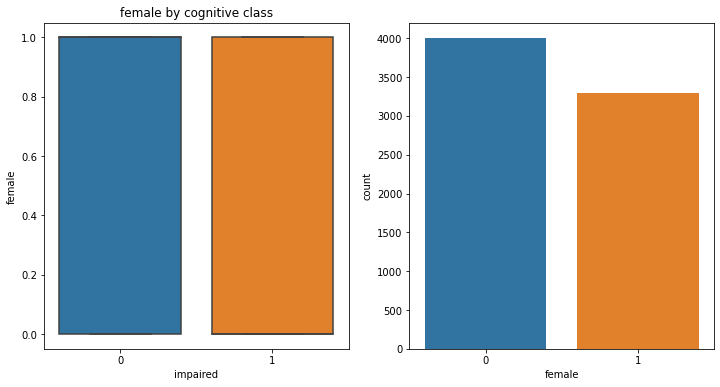

  t-test on:0  AGE                         difference in means +1.69     Ttest_indResult(statistic=9.705924804415469, pvalue=5.997197171330581e-22)
fruit
  t-test on:1  APOE4                       difference in means -0.382    Ttest_indResult(statistic=-26.082408867623798, pvalue=9.30873553282031e-138)
fruit
  t-test on:2  CDRSB_bl                    difference in means -1.61     Ttest_indResult(statistic=-78.98909626509295, pvalue=0.0)
fruit
  t-test on:3  ADAS11_bl                   difference in means -4.89     Ttest_indResult(statistic=-45.756319830467405, pvalue=0.0)
fruit
  t-test on:4  MMSE_bl                     difference in means +1.77     Ttest_indResult(statistic=41.068573339211945, pvalue=0.0)
fruit
  t-test on:5  RAVLT_immediate_bl          difference in means +11.2     Ttest_indResult(statistic=38.71958010548803, pvalue=3.907898501305535e-264)
fruit
  t-test on:6  RAVLT_learning_bl           difference in means +1.86     Ttest_indResult(statistic=27.77622157700926, pvalu

In [16]:
for i in t2.columns:
    plt.subplots(figsize=(12,6))
    plt.subplot(1,2,1,)
    sns.boxplot(y=t2[i], x = t2.impaired, data = t2)
    plt.title(str(i) + " by cognitive class")
    plt.subplot(1,2,2)
    if t2[i].dtype == ("float64" or "int64"):
        sns.distplot(t2[i], kde=False )
        plt.title("Overall Distribution")
        
    else:
        sns.countplot(x=i, data = t2)
        
    plt.show()
    
for c,v in enumerate(ts.get_group(0).columns):
    m = ts.get_group(0)[v].mean() - ts.get_group(1)[v].mean()
    tango = scipy.stats.ttest_ind(ts.get_group(0)[v], ts.get_group(1)[v], axis=0, equal_var=False, nan_policy='propagate')
    mango = "fruit"
    #mango = scipy.stats.chisquare(f_obs=ts.get_group(1)[v], f_exp=ts.get_group(0)[v])
    line_new = '{:>12}{:<3}{:<28}{} {:<+9.3} {}'.format("t-test on:", c, v, "difference in means", m, tango)
    print(line_new)
    print(mango)
    

In [17]:
# number of patients (not data points) in each group
ts.rid.nunique()
    

impaired
0    187
1    799
Name: rid, dtype: int64

In [18]:
v = "female"
#mango = scipy.stats.chisquare(f_obs=ts.get_group(1)[v]., f_exp=ts.get_group(0)[v])

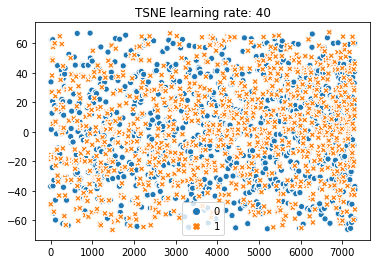

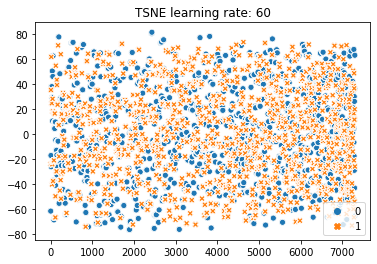

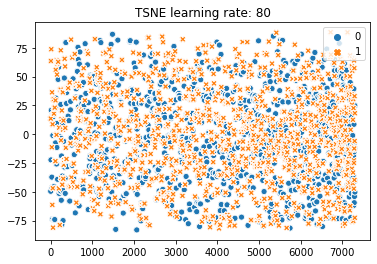

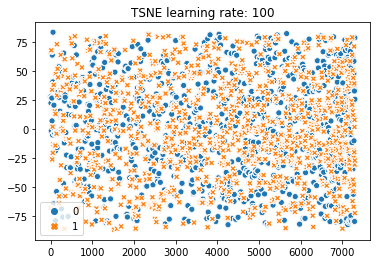

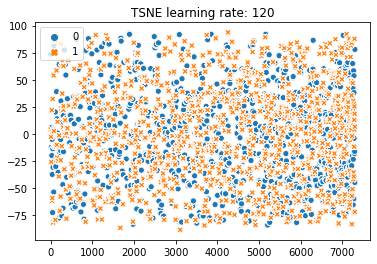

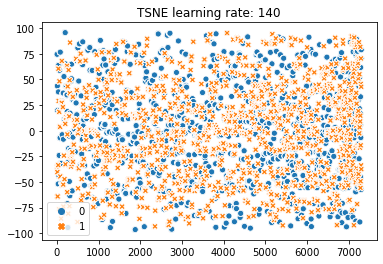

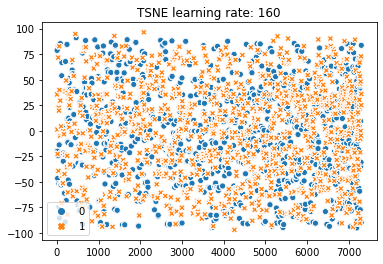

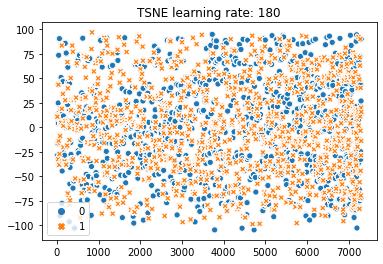

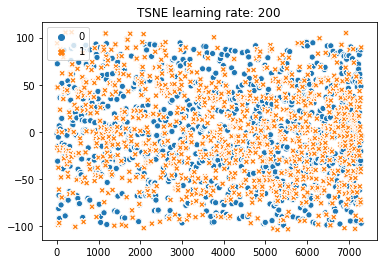

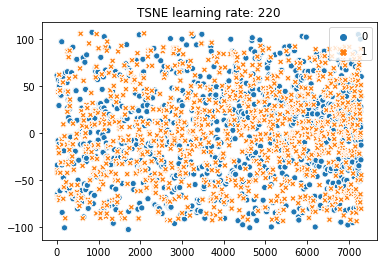

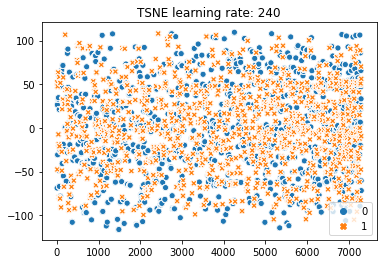

In [19]:
learn = np.arange(40,260,20)
for n in learn:
    t_mod = TSNE(learning_rate=n)
    t_feat = t_mod.fit_transform(t2)
    sns.scatterplot(data=t_feat, hue=t2.impaired)
    t_str = "TSNE learning rate: " + str(n)
    plt.title(t_str)
    plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
clf_tree = DecisionTreeClassifier()

In [21]:
x = fill4.iloc[:,features]
x.info()
t1 = x.copy()
t1["rid"] =  filled.RID
t1["impaired"] = filled.impaired
t1["female"] = 1
t1.loc[t1.PTGENDER == "Male","female"] = 0
t1 = t1.drop("PTGENDER", axis=1)
t1.impaired = t1.impaired.astype("int")
t2 = t1.dropna()
t2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12740
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   AGE                         12741 non-null  float64 
 1   PTGENDER                    12741 non-null  category
 2   APOE4                       12729 non-null  float64 
 3   CDRSB_bl                    12741 non-null  float64 
 4   ADAS11_bl                   12724 non-null  float64 
 5   MMSE_bl                     12741 non-null  int64   
 6   RAVLT_immediate_bl          12705 non-null  float64 
 7   RAVLT_learning_bl           12705 non-null  float64 
 8   Ventricles_bl               12251 non-null  float64 
 9   Hippocampus_bl              10960 non-null  float64 
 10  Entorhinal_bl               10847 non-null  float64 
 11  Fusiform_bl                 10847 non-null  float64 
 12  MidTemp_bl                  10847 non-null  float64 
 13  ICV_bl          

In [22]:
x = t2.drop("impaired", axis =1)
y = t2.loc[:,"impaired"]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42, stratify="rid")
gss = GroupShuffleSplit(n_splits=1, train_size=.8, random_state=42)
blank = gss.split(x, y, groups=x["rid"].values)
test_ind =[]

for a, b in blank:
    print("train index:",a ,"\ntest index:", b)
    test_ind.append([a,b])
print(len(x))



train index: [   0    1    2 ... 7299 7300 7301] 
test index: [ 224  225  226 ... 7294 7295 7296]
7302


In [23]:
test_ind[0][0]
type(test_ind)
len(test_ind)
test_ind[0][0]
type(test_ind[0][0])
tests= test_ind[0][0]
trains = test_ind[0][1]
#x.loc[tests,:].head()
x.head()
#x_train = x[list(test_ind[0][0])]
#x_train.info()


,AGE,APOE4,CDRSB_bl,ADAS11_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,Ventricles_bl,Hippocampus_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MMSE,Hippocampus,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,rid,female
13,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,15506.0,18422.0,1920690.0,20.0,5319.00,741.50,239.7,22.830,3,0
14,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,15506.0,18422.0,1920690.0,24.0,5446.00,671.45,245.7,23.505,3,0
15,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,15506.0,18422.0,1920690.0,17.0,5157.00,601.40,251.7,24.180,3,0
16,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,15506.0,18422.0,1920690.0,20.0,5265.25,671.45,245.7,23.505,3,0
17,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,15506.0,18422.0,1920690.0,19.0,5139.00,671.45,245.7,23.505,3,0


In [24]:
t2.head()

,AGE,APOE4,CDRSB_bl,ADAS11_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,Ventricles_bl,Hippocampus_bl,Entorhinal_bl,...,MidTemp_bl,ICV_bl,MMSE,Hippocampus,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,rid,impaired,female
13,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,20.0,5319.00,741.50,239.7,22.830,3,1,0
14,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,24.0,5446.00,671.45,245.7,23.505,3,1,0
15,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,17.0,5157.00,601.40,251.7,24.180,3,1,0
16,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,20.0,5265.25,671.45,245.7,23.505,3,1,0
17,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,19.0,5139.00,671.45,245.7,23.505,3,1,0


In [25]:
from sklearn.model_selection import GroupKFold
groups = x.rid.values
group_kfold = GroupKFold(n_splits=10)
group_kfold.get_n_splits(x, y, groups)
train_inds =[]
test_inds = []
for train_index, test_index in group_kfold.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index), len(test_index))
    print(type(train_index))
    train_inds.append(train_index)
    test_inds.append(test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#    print("xtrain vals:",X_train, X_test,"\nytrain vals:", y_train, y_test)




TRAIN: [   0    1    2 ... 7299 7300 7301] TEST: [  32   33   34   35   36   77   78   79   80   81  127  128  129  130
  131  132  133  134  135  136  137  138  139  140  141  142  143  144
  183  184  185  186  187  188  189  190  191  192  193  194  195  196
  197  198  199  243  244  245  246  272  273  274  275  276  277  278
  279  280  281  339  340  341  342  343  344  345  346  347  348  349
  350  495  496  497  498  499  500  501  502  583  584  585  586  587
  588  688  689  690  691  692  693  714  715  716  717  718  719  720
  721  722  723  724  725  726  727  728  729  730  731  732  733  734
  735  736  737  738  739  740  741  742  743  744  950  951  952  953
  954  980  981  982  983  984  985 1109 1110 1111 1112 1113 1114 1115
 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1328 1329
 1330 1331 1332 1333 1334 1366 1367 1368 1369 1370 1371 1372 1373 1374
 1375 1376 1377 1378 1492 1493 1494 1495 1496 1497 1498 1499 1500 1501
 1502 1503 1504 1505 1506 17

In [26]:
t2.head()


,AGE,APOE4,CDRSB_bl,ADAS11_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,Ventricles_bl,Hippocampus_bl,Entorhinal_bl,...,MidTemp_bl,ICV_bl,MMSE,Hippocampus,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,rid,impaired,female
13,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,20.0,5319.00,741.50,239.7,22.830,3,1,0
14,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,24.0,5446.00,671.45,245.7,23.505,3,1,0
15,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,17.0,5157.00,601.40,251.7,24.180,3,1,0
16,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,20.0,5265.25,671.45,245.7,23.505,3,1,0
17,81.3,1.0,4.5,22.0,20,22.0,1.0,84599.0,5319.0,1791.0,...,18422.0,1920690.0,19.0,5139.00,671.45,245.7,23.505,3,1,0


In [27]:
df_trial_tr = t2.iloc[list(train_inds[0]),:]
validation = t2.iloc[test_inds[0],:]

In [28]:
df_trial_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6571 entries, 13 to 12740
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         6571 non-null   float64
 1   APOE4                       6571 non-null   float64
 2   CDRSB_bl                    6571 non-null   float64
 3   ADAS11_bl                   6571 non-null   float64
 4   MMSE_bl                     6571 non-null   int64  
 5   RAVLT_immediate_bl          6571 non-null   float64
 6   RAVLT_learning_bl           6571 non-null   float64
 7   Ventricles_bl               6571 non-null   float64
 8   Hippocampus_bl              6571 non-null   float64
 9   Entorhinal_bl               6571 non-null   float64
 10  Fusiform_bl                 6571 non-null   float64
 11  MidTemp_bl                  6571 non-null   float64
 12  ICV_bl                      6571 non-null   float64
 13  MMSE                        657

In [29]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 57 to 12727
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         731 non-null    float64
 1   APOE4                       731 non-null    float64
 2   CDRSB_bl                    731 non-null    float64
 3   ADAS11_bl                   731 non-null    float64
 4   MMSE_bl                     731 non-null    int64  
 5   RAVLT_immediate_bl          731 non-null    float64
 6   RAVLT_learning_bl           731 non-null    float64
 7   Ventricles_bl               731 non-null    float64
 8   Hippocampus_bl              731 non-null    float64
 9   Entorhinal_bl               731 non-null    float64
 10  Fusiform_bl                 731 non-null    float64
 11  MidTemp_bl                  731 non-null    float64
 12  ICV_bl                      731 non-null    float64
 13  MMSE                        731 

In [30]:
rid_test = validation.rid.unique()
rid_train = df_trial_tr.rid.unique()
intersection_set = set.intersection(set(list(rid_test)), set(list(rid_train)))
intersection_list = list(intersection_set)
print(intersection_list)

[]


In [31]:
x = df_trial_tr.drop("impaired", axis=1)
y = df_trial_tr.loc[:, "impaired"]

groups = x.rid.values
group_kfold = GroupKFold(n_splits=5)
group_kfold.get_n_splits(x, y, groups)
train_inds =[]
test_inds = []
for train_index, test_index in group_kfold.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index), len(test_index))
    print(type(train_index))
    train_inds.append(train_index)
    test_inds.append(test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#    print("xtrain vals:",X_train, X_test,"\nytrain vals:", y_train, y_test)

TRAIN: [   0    1    2 ... 6568 6569 6570] TEST: [  11   12   13 ... 6563 6564 6565]
5256 1315
<class 'numpy.ndarray'>
TRAIN: [   0    1    2 ... 6566 6567 6568] TEST: [  45   46   47 ... 6551 6569 6570]
5257 1314
<class 'numpy.ndarray'>
TRAIN: [   0    1    2 ... 6568 6569 6570] TEST: [  51   52   53 ... 6554 6558 6559]
5257 1314
<class 'numpy.ndarray'>
TRAIN: [  11   12   13 ... 6565 6569 6570] TEST: [   0    1    2 ... 6566 6567 6568]
5257 1314
<class 'numpy.ndarray'>
TRAIN: [   0    1    2 ... 6568 6569 6570] TEST: [  38   39   40 ... 6560 6561 6562]
5257 1314
<class 'numpy.ndarray'>


In [32]:
train = df_trial_tr.iloc[list(train_inds[0]),:]
test = df_trial_tr.iloc[test_inds[0],:]

In [33]:
x_train = train.drop("impaired", axis=1)
y_train = train.loc[:,"impaired"]

x_test = test.drop("impaired", axis=1)
y_test = test.loc[:,"impaired"]

decision tree 1st
boosting 2nd 
k nearest neighbour (no reall training)
gaussian biased model - needs independant 
naive bayes
summarise results in a table + training time
pros, cons and assumptions. of algorithms
then grid search.

ensure hyper parameters maxima are not at a boundary

intro: point of project.
value to customer
discuss the results be honest about shortcommings of model/analysis // strengths/weaknesses.
future work:




finally ensemble method.

#plot model performance on training data

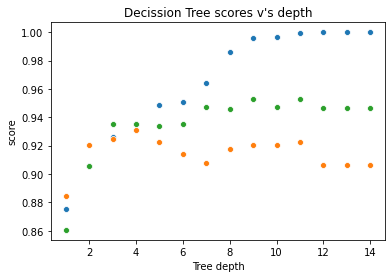

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
plot_x = range(1,15)
scores = []
test = []
recall = []
for k in plot_x:
    clf = DecisionTreeClassifier(max_depth = k, random_state=42)
#cross_val_score(clf, iris.data, iris.target, cv=10)

    clf.fit(x_train, y_train)
    clf.score(x_test, y_test)
    scores.append(clf.score(x_train, y_train))
    test.append(clf.score(x_test, y_test))
    y_pred = clf.predict(x_test)
    recall.append(recall_score(y_test, y_pred))
    
    
sns.scatterplot(x= plot_x, y = scores)
plt.title("Decission Tree train scores v's depth")
plt.xlabel("Tree depth")
plt.ylabel("training score")
sns.scatterplot(x= plot_x, y = test)
plt.title("Decission Tree scores v's depth")
plt.xlabel("Tree depth")
plt.ylabel("score")
sns.scatterplot(x=plot_x, y=recall)
plt.show()

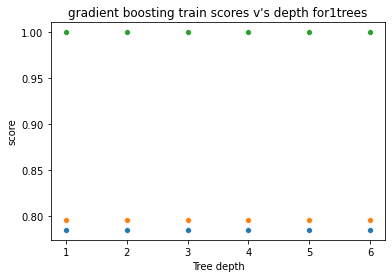

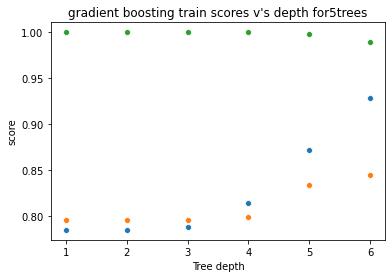

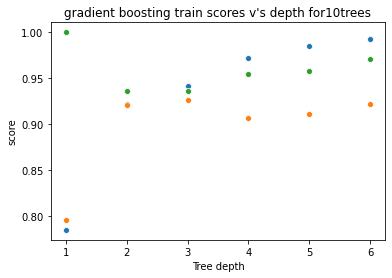

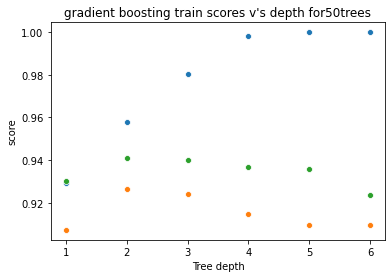

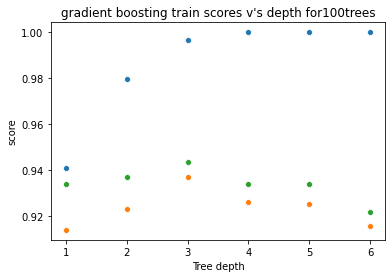

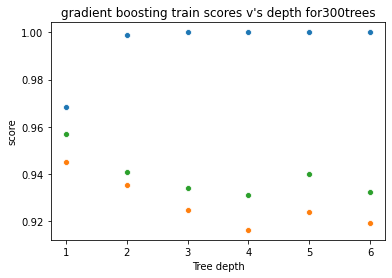

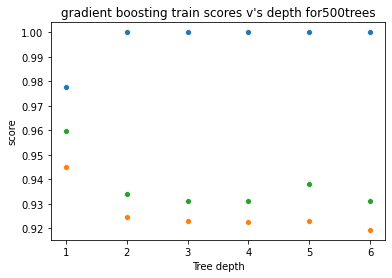

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#grid search number of trees up to 1.2 x number of columns
#tree depth 1-10


plot_x = range(1,7)
tree_count = [1,5,10,50,100,300,500]
for z in tree_count:
    scores = []
    test = []
    recall = []
    for k in plot_x:
        clf = GradientBoostingClassifier(n_estimators=z, max_depth = k, random_state=42)
#cross_val_score(clf, iris.data, iris.target, cv=10)

        clf.fit(x_train, y_train)
        clf.score(x_test, y_test)
        y_pred = clf.predict(x_test)
        scores.append(clf.score(x_train, y_train))
        test.append(clf.score(x_test, y_test))
        recall.append(recall_score(y_test, y_pred))
    sns.scatterplot(x= plot_x, y = scores)
    plt.title(str("gradient boosting train scores v's depth for" + str(z)+ "trees"))
    plt.xlabel("Tree depth")
    plt.ylabel("training score")
    sns.scatterplot(x= plot_x, y = test)
    sns.scatterplot(x= plot_x, y= recall)
    plt.xlabel("Tree depth")
    plt.ylabel("score")
    plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
nrange = np.logspace(0,3,10)
drange = arange(1,10,1)
parameters = {"n_estimators":nrange,"max_depth":drange}
clf = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(clf, parameters, scoring="recall", cv =)
grid.fit(x_train, y_train)

grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [41]:
type(grid.cv_results_)
print(grid.best_params_, grid.best_score_)

{'max_depth': 2, 'n_estimators': 300} 0.8698793110309573


In [43]:
c_space = np.logspace(-5, 8, 15)
len(c_space)

15

In [38]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

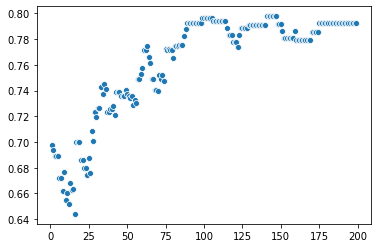

In [107]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
recall = []
for k in range(1,200):
    neigh = KNeighborsClassifier(n_neighbors=k)

    neigh.fit(x_train, y_train)

    #print(neigh.score(x_test, y_test), "with,", k,"neighbours")
    scores.append(neigh.score(x_test, y_test))
sns.scatterplot(x=range(1,200), y =scores)
plt.show()

[1, 3, 10, 30, 100, 300]


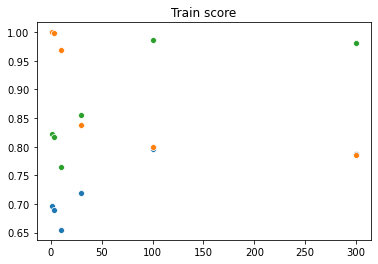

In [51]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
train = []
recall = []

plot_x = [1,3,10,30,100,300]
print(plot_x)
for k in plot_x:
    neigh = KNeighborsClassifier(n_neighbors=k)

    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)

    #print(neigh.score(x_test, y_test), "with,", k,"neighbours")
    scores.append(neigh.score(x_test, y_test))
    train.append(neigh.score(x_train, y_train))
    recall.append(recall_score(y_test, y_pred))
sns.scatterplot(x=plot_x, y =scores)
plt.title("Test score")
sns.scatterplot(x=plot_x, y=train)
plt.title("Train score")
sns.scatterplot(x=plot_x, y = recall)
plt.show()

[ 50  60  70  80  90 100 110 120 130 140]


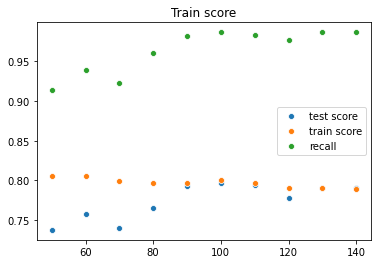

In [54]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
train = []
recall = []

plot_x = np.arange(50,150,10)
print(plot_x)
for k in plot_x:
    neigh = KNeighborsClassifier(n_neighbors=k)

    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)

    #print(neigh.score(x_test, y_test), "with,", k,"neighbours")
    scores.append(neigh.score(x_test, y_test))
    train.append(neigh.score(x_train, y_train))
    recall.append(recall_score(y_test, y_pred))
sns.scatterplot(x=plot_x, y =scores)
plt.title("Test score")
sns.scatterplot(x=plot_x, y=train)
sns.scatterplot(x=plot_x, y = recall)
plt.title("Train score")
plt.legend(labels = ["test score", "train score", "recall"])
plt.show()

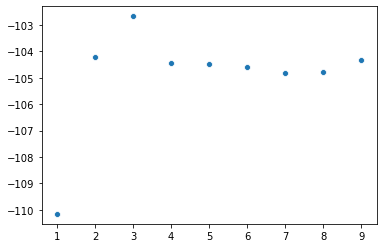

In [112]:
from sklearn.mixture import GaussianMixture
scores = []
plot_x = range(1,10)
for k in plot_x:
    gm = GaussianMixture(n_components = k)
    gm.fit(x_train, y_train)
    scores.append(gm.score(x_test, y_test))
    #confusion matrix type 1 type 2 (accuracy/precision/recall)
sns.scatterplot(x=plot_x, y=scores)
plt.show()


In [114]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(X, y)
gpc.score(X, y)

gpc.predict_proba(X[:2,:])

array([[0.83548752, 0.03228706, 0.13222543],
       [0.79064206, 0.06525643, 0.14410151]])

In [116]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=42).fit(x_train, y_train)
gpc.score(x_test, y_test)



0.7110266159695817

In [129]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [40]:
import numpy as np
from sklearn.model_selection import GroupKFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], ['a','b'], ['c','d']])
y = np.array([1, 2, 3, 4, 5, 6])
groups = np.array([0, 0, 1, 2, 3, 3])
group_kfold = GroupKFold(n_splits=2)
group_kfold.get_n_splits(X, y, groups)

print(group_kfold)

for train_index, test_index in group_kfold.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("xtrain vals:",X_train, X_test,"\nytrain vals:", y_train, y_test)

GroupKFold(n_splits=2)
TRAIN: [0 1 2] TEST: [3 4 5]
xtrain vals: [['1' '2']
 ['3' '4']
 ['5' '6']] [['7' '8']
 ['a' 'b']
 ['c' 'd']] 
ytrain vals: [1 2 3] [4 5 6]
TRAIN: [3 4 5] TEST: [0 1 2]
xtrain vals: [['7' '8']
 ['a' 'b']
 ['c' 'd']] [['1' '2']
 ['3' '4']
 ['5' '6']] 
ytrain vals: [4 5 6] [1 2 3]


In [ ]:
#my data



NameError: name 'cmap_data' is not defined

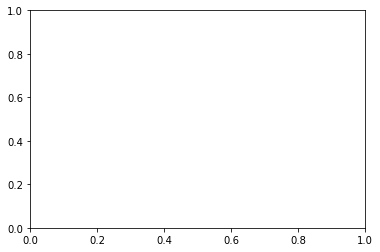

In [34]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

In [35]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [36]:
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

NameError: name 'KFold' is not defined

In [37]:
def plot_my_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, len(X)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [38]:
x = t2.drop("impaired", axis =1)
y = t2.loc[:,"impaired"]
for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_my_cv_indices(this_cv, x.iloc[:,2], y, x.rid, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

NameError: name 'cvs' is not defined